In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
data = pd.read_excel("data/clean_predictions.xlsx",  index_col = 0)
data

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),Refuse_Pct,label,probs
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,...,0.0,0.0,3.0,1.267,1.429,2.186,0.0,0.0,0,"[0.9998394250869751, 3.4087479434674606e-05, 0..."
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,...,0.0,0.0,NaN,0.130,0.103,0.202,0.0,0.0,1,"[2.999854586960282e-08, 0.9994088411331177, 4...."
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,...,NaN,NaN,0.0,2.866,4.878,1.673,130.0,29.0,3,"[2.9562095733126625e-05, 7.411003025481477e-05..."
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,...,0.7,29.0,0.0,7.670,10.140,2.320,58.0,27.0,3,"[0.00026382150826975703, 0.0006710545276291668..."
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,...,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,4,"[1.605821307748556e-05, 0.028907138854265213, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,NaN,60.0,...,NaN,NaN,NaN,1.119,2.190,1.154,64.0,0.0,3,"[0.00042958883568644524, 0.0012661732034757733..."
7752,"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23.0,...,NaN,NaN,1.6,6.067,6.438,0.572,80.0,9.0,3,"[7.852991984691471e-05, 0.00026358681498095393..."
7753,"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE U...",74.00,132,5.06,7.59,2.09,11.27,1.8,NaN,119.0,...,0.0,0.0,NaN,3.530,2.587,1.076,15.0,0.0,1,"[0.000639920006506145, 0.8160973191261292, 0.1..."
7754,"APPLES,DEHYD (LO MOIST),SULFURED,STWD",79.36,74,0.28,0.12,0.33,19.91,2.6,NaN,4.0,...,0.0,0.0,NaN,0.020,0.005,0.036,0.0,0.0,1,"[4.736647740699595e-10, 0.9999643564224243, 3...."


In [8]:
data.isnull().sum(axis=1)

0        2
1        9
2        2
3        0
4        0
        ..
7751    11
7752     4
7753     8
7754     9
7755     0
Length: 7672, dtype: int64

In [9]:
vars_ = ['Carbohydrt_(g)', 'Protein_(g)', 'Lipid_Tot_(g)', 'Fiber_TD_(g)', 'Water_(g)', 'Energ_Kcal','Ash_(g)']

In [10]:
data_x = data[vars_].fillna(0)
data_y = data['label']
data_x

,Carbohydrt_(g),Protein_(g),Lipid_Tot_(g),Fiber_TD_(g),Water_(g),Energ_Kcal,Ash_(g)
0,73.40,12.00,6.00,5.2,4.70,393,3.90
1,4.62,2.52,0.62,2.4,90.20,28,2.04
2,0.00,24.06,11.09,0.0,63.89,196,1.56
3,0.00,20.43,21.35,0.0,54.73,280,3.51
4,0.04,0.00,0.00,0.0,94.78,18,0.02
...,...,...,...,...,...,...,...
7751,0.00,17.54,4.93,0.0,77.33,119,1.08
7752,0.00,20.59,15.04,0.0,63.95,224,0.87
7753,11.27,5.06,7.59,1.8,74.00,132,2.09
7754,19.91,0.28,0.12,2.6,79.36,74,0.33


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_x = scaler.fit_transform(data_x)

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2)

train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

train_x.shape
train_y.shape

(6137,)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score

clf = RandomForestClassifier(n_estimators=20, max_depth = 20, random_state=0, criterion = "entropy")
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_y, y_pred)))
print('R2 score:  {0:0.4f}',  format(r2_score(test_y, y_pred)))

Model accuracy score with 100 decision-trees : 0.9616
R2 score:  {0:0.4f} 0.9603070636575982


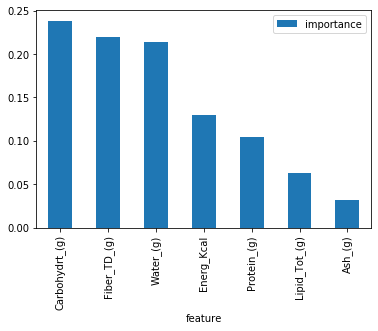

In [13]:
featureImportance = pd.DataFrame({"feature": data[vars_].columns,  "importance": clf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.plot.bar()

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
keras.backend.clear_session()

def learning_rate_reduction():
    return keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00002,
                                            mode='max')
def r2_keras(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

    mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', verbose = 1, mode='max')

def create_keras_model():
    model = keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape = (len(vars_),)),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(5, activation="softmax")])

    load_callback = keras.callbacks.LambdaCallback(on_epoch_end = lambda: model.load_weights('.mdl_wts.hdf5'))

    model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ['accuracy', r2_keras])
     return model

dnn_clf = KerasClassifier(build_fn=create_keras_model, verbose=0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
dnn_clf.fit(train_x,
          train_y,
          batch_size = 32,
          epochs = 15,
          validation_data=(test_x,test_y),
          callbacks=[learning_rate_reduction(), mcp_save, load_callback])
#model.load_weights('.mdl_wts.hdf5')

dnn_clf.fit(train_x,
          train_y,
          batch_size = 64,
          epochs = 15,
          validation_data=(test_x,test_y),
          callbacks=[learning_rate_reduction(), mcp_save, load_callback])
#model.load_weights('.mdl_wts.hdf5')

dnn_clf.fit(train_x,
          train_y,
          batch_size = 128,
          epochs = 15,
          validation_data=(test_x,test_y),
          callbacks=[learning_rate_reduction(), mcp_save, load_callback])
#model.load_weights('.mdl_wts.hdf5')

dnn_clf.fit(train_x,
          train_y,
          batch_size = 256,
          epochs = 15,
          validation_data=(test_x,test_y),
          callbacks=[learning_rate_reduction(), mcp_save, load_callback])
#model.load_weights('.mdl_wts.hdf5')


Train on 6137 samples, validate on 1535 samples
Epoch 1/15
5888/6137 [===========================>..] - ETA: 0s - loss: 0.4484 - acc: 0.8346 - r2_keras: -12.3077
Epoch 00001: val_acc improved from -inf to 0.26124, saving model to .mdl_wts.hdf5
6137/6137 [==============================] - 2s 296us/sample - loss: 0.4475 - acc: 0.8359 - r2_keras: -12.2835 - val_loss: 1.2327 - val_acc: 0.2612 - val_r2_keras: -11.1773
Epoch 2/15
6112/6137 [============================>.] - ETA: 0s - loss: 0.3812 - acc: 0.8559 - r2_keras: -12.2362
Epoch 00002: val_acc improved from 0.26124 to 0.78046, saving model to .mdl_wts.hdf5
6137/6137 [==============================] - 1s 188us/sample - loss: 0.3812 - acc: 0.8560 - r2_keras: -12.2390 - val_loss: 0.6900 - val_acc: 0.7805 - val_r2_keras: -11.2659
Epoch 3/15
5952/6137 [============================>.] - ETA: 0s - loss: 0.3283 - acc: 0.8696 - r2_keras: -12.1705
Epoch 00003: val_acc improved from 0.78046 to 0.87427, saving model to .mdl_wts.hdf5
6137/6137 [=

In [84]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

estimators = [dnn_clf, clf]

ensemble = StackingClassifier(
   classifiers = estimators,
   meta_classifier = LogisticRegression(penalty='elasticnet',
                                        class_weight='balanced',
                                        solver = 'saga',
                                        l1_ratio = 0.5,
                                        random_state=1),
   use_probas = True)

print(ensemble.fit(train_x, train_y).score(test_x, test_y))
print(r2_score(test_y, ensemble.predict(test_x)))

0.9517915309446254
0.9486430639325867


In [179]:
# model.load_weights('.mdl_wts.hdf5')
# model.evaluate(test_x, test_y, verbose=2)

1535/1535 - 0s - loss: 0.2167 - acc: 0.9375


[0.21670650121443435, 0.9374593]

In [177]:
# data = pd.read_excel("data/train.xlsx", index_col = 0)
# data.drop(columns=['GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2'], inplace = True)
# np.mean(data.isnull().sum(axis=1))
# data

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),Refuse_Pct
Shrt_Desc,,,,,,,,,,,,,,,,,,,,,
"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,157.0,5.00,0.0,0.0,3.0,1.267,1.429,2.186,0.0,0.0
"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,NaN,NaN,0.0,0.0,NaN,0.130,0.103,0.202,0.0,0.0
"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD,ROTISSERIE,OR",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,0.0,0.25,NaN,NaN,0.0,2.866,4.878,1.673,130.0,29.0
"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.0,0.24,0.7,29.0,0.0,7.670,10.140,2.320,58.0,27.0
"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,NaN,60.0,0.90,...,NaN,NaN,NaN,NaN,NaN,1.119,2.190,1.154,64.0,0.0
"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23.0,1.47,...,0.0,0.38,NaN,NaN,1.6,6.067,6.438,0.572,80.0,9.0
"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE USING MARGARINE",74.00,132,5.06,7.59,2.09,11.27,1.8,NaN,119.0,0.64,...,NaN,NaN,0.0,0.0,NaN,3.530,2.587,1.076,15.0,0.0


In [178]:
# data_x= data[vars_] .to_numpy()

In [280]:
# raw_predictions = model.predict(data_x)
# raw_predictions

array([[0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604],
       [0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604],
       [0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604],
       ...,
       [0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604],
       [0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604],
       [0.2108407 , 0.27302235, 0.16644551, 0.31773537, 0.03195604]],
      dtype=float32)

In [21]:
# print(np.argmax(raw_predictions[4]))
# print(raw_predictions[4])

4
[1.6058213e-05 2.8907139e-02 3.3466111e-07 1.7714945e-05 9.7105879e-01]


In [22]:
# data['label'] = list(map(np.argmax, raw_predictions))
# data['probs'] = raw_predictions.tolist()

In [23]:
# data

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),Refuse_Pct,label,probs
Shrt_Desc,,,,,,,,,,,,,,,,,,,,,
"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,0.0,0.0,3.0,1.267,1.429,2.186,0.0,0.0,0,"[0.9998394250869751, 3.4087479434674606e-05, 0..."
"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,0.0,0.0,NaN,0.130,0.103,0.202,0.0,0.0,1,"[2.999854586960282e-08, 0.9994088411331177, 4...."
"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD,ROTISSERIE,OR",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,NaN,NaN,0.0,2.866,4.878,1.673,130.0,29.0,3,"[2.9562095733126625e-05, 7.411003025481477e-05..."
"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.7,29.0,0.0,7.670,10.140,2.320,58.0,27.0,3,"[0.00026382150826975703, 0.0006710545276291668..."
"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,4,"[1.605821307748556e-05, 0.028907138854265213, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,NaN,60.0,0.90,...,NaN,NaN,NaN,1.119,2.190,1.154,64.0,0.0,3,"[0.00042958883568644524, 0.0012661732034757733..."
"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23.0,1.47,...,NaN,NaN,1.6,6.067,6.438,0.572,80.0,9.0,3,"[7.852991984691471e-05, 0.00026358681498095393..."
"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE USING MARGARINE",74.00,132,5.06,7.59,2.09,11.27,1.8,NaN,119.0,0.64,...,0.0,0.0,NaN,3.530,2.587,1.076,15.0,0.0,1,"[0.000639920006506145, 0.8160973191261292, 0.1..."


In [172]:
# raw_predictions


array([[9.98343945e-01, 3.79954072e-05, 1.61805528e-03, 2.68236757e-08,
        1.27627867e-14],
       [4.86016688e-05, 9.65741575e-01, 2.61100940e-02, 6.88281748e-03,
        1.21694722e-03],
       [2.62641057e-04, 9.96801191e-06, 1.55781331e-02, 9.84149158e-01,
        5.26201802e-08],
       ...,
       [2.80091097e-03, 3.65672648e-01, 5.85653663e-01, 4.51869145e-02,
        6.85835897e-04],
       [3.90644505e-04, 9.81382370e-01, 1.79375708e-02, 1.75325098e-04,
        1.14139104e-04],
       [7.58473834e-05, 5.56117629e-05, 5.41221052e-02, 9.45746303e-01,
        7.19480582e-08]], dtype=float32)

In [ ]:
# data['label'] = clf.predict(data[vars_])


In [3]:
def predict_sk(model, data, x_names, y_name, file_name = None):
#     from sklearn.preprocessing import MinMaxScaler
    data = data.copy().fillna(0)
    data_x = data[x_names]
    
    scaler = MinMaxScaler()
    data_x = scaler.fit_transform(data_x)
    data[y_name] = list(map(np.argmax, model.predict(data_x)))
    raw = np.array(model.predict_proba(data_x))
    data = data.reset_index()
    return pd.concat([data, pd.DataFrame(np.transpose(raw[:,:, 1]))], axis = 1)

def predict_ensemle(model, data, x_names, y_name, file_name = None):
#     from sklearn.preprocessing import MinMaxScaler
    data = data.copy().fillna(0)
    data_x = data[x_names]
    
    scaler = MinMaxScaler()
    data_x = scaler.fit_transform(data_x)
    data[y_name] = model.predict(data_x)
    raw = model.predict_proba(data_x)
    data = data.reset_index()
    return pd.concat([data, pd.DataFrame(raw)], axis = 1)

def predict_keras(model, data, x_names, y_name, file_name = None):
#     from sklearn.preprocessing import MinMaxScaler
    data = data.copy().fillna(0)
    data_x = data[x_names]
    
    scaler = MinMaxScaler()
    data_x = scaler.fit_transform(data_x)
    data[y_name] = list(map(np.argmax, model.predict(data_x)))
    raw = model.predict_proba(data_x)
    
    data = data.reset_index()
    return pd.concat([data, pd.DataFrame(raw)], axis = 1)


In [85]:
ensemle_predictions = predict_ensemle(ensemble, pd.read_excel("data/train.xlsx", index_col = 0), vars_, 'label')
ensemle_predictions.to_excel('data/ensemble_class_predictions.xlsx')
ensemle_predictions

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,label,0,1,2,3,4
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,...,1 tbsp,15.0,.5 oz,0.0,0,0.997732,0.000757,0.000347,0.000474,0.000689
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,0.00,58.0,...,1 cup,33.0,1 piece,0.0,1,0.000396,0.998137,0.000378,0.000425,0.000665
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,...,1 thigh,85.0,"1 serving, (3 oz)",29.0,3,0.000488,0.000514,0.001976,0.996022,0.000999
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,...,1 cup,85.0,3 oz,27.0,3,0.000465,0.000492,0.001829,0.996256,0.000958
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,...,1 tbsp,238.0,1 cup,0.0,4,0.001688,0.001674,0.004046,0.000380,0.992213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,0.00,60.0,...,3 oz,198.0,1 fillet,0.0,3,0.000869,0.000889,0.005114,0.991458,0.001671
7752,"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23.0,...,3 oz,0.0,0,9.0,3,0.000495,0.000522,0.002026,0.995944,0.001013
7753,"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE U...",74.00,132,5.06,7.59,2.09,11.27,1.8,0.00,119.0,...,1 cup,0.0,0,0.0,1,0.000396,0.998137,0.000378,0.000425,0.000665
7754,"APPLES,DEHYD (LO MOIST),SULFURED,STWD",79.36,74,0.28,0.12,0.33,19.91,2.6,0.00,4.0,...,1 cup,0.0,0,0.0,1,0.000396,0.998137,0.000378,0.000425,0.000665


In [18]:
def type_format(w):
    m = [1,5,3,4,2]
    return m[w]

In [26]:
nn_predictions = predict_keras(model, pd.read_excel("data/test.xlsx", index_col = 0), vars_, 'label')
nn_predictions

KeyError: "['Energ_Kcal'] not in index"

In [27]:
nn_predictions['Pred_class'] = nn_predictions["label"].apply(type_format)

nn_predictions.to_csv('out/Pred_main.csv', index= False, columns = ['Pred_class'], header = ['Pred_class'])